# TEXT BLOB FÜR KLINKBEWERTUNG.DE

# erster schrit. 
-----------
was wir brauchen. Importieren

## Textanalyse mit TextBlob
Textblob ist unser Zile.
TextBlob wird benötigt


In [346]:
import textblob

from textblob import TextBlob
# Deutchen Textblob
from textblob_de import TextBlobDE
#ergebnis zeigen beim Textblob
from textblob.sentiments import NaiveBayesAnalyzer
#letze benötigte von dem Textblob bibliothek
from textblob_de import PatternParser


# mit der Dateien zu bearbeiten, wird folgende Bibliotheken benötigt

In [347]:
import pandas as pd
import numpy as np
import nltk
import csv

# nun die Folgenden werden benötigt
-------
* Importierung von matplotlib
* nltk
* re
* pathlib

In [348]:

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline



from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import re


from pathlib import Path


# Schpeischen wir csv-Daten in einem DataFrame ab.
----------


In [349]:
data = pd.read_csv(r'clinical_data.csv', encoding='utf-8')

# Darstellung des Dataframes

In [350]:
df = pd.DataFrame(data, columns= ['Name der Klinik', 'Titel','Datum','Fachbereich','Erfahrungsbericht','Gesamtzufriedenheit','Qualität der Beratung','Mediz. Behandlung','Verwaltung und Abläufe','Ausstattung und Gestaltung'])


# Dataframe überprüfen lassen
------
* Scrapping von Klinikbewertungen.de
# seh mal Head

In [351]:
df.head(5)

Name der Klinik                             Titel       Datum  \
0  Augenklinik Dr.Hoffmann                      super Klinik  16.03.2021   
1  Augenklinik Dr.Hoffmann  Ich war sehr zufrieden mit allem  20.01.2021   
2  Augenklinik Dr.Hoffmann        Endlich wieder klare Sicht  16.11.2020   
3  Augenklinik Dr.Hoffmann                 Beste Augenklinik  22.03.2020   
4  Augenklinik Dr.Hoffmann      ich war ringsherum zufrieden  14.11.2019   

  Fachbereich  \
0       Augen   
1       Augen   
2       Augen   
3       Augen   
4       Augen   

                                                                                     Erfahrungsbericht  \
0  Meine Laser OP grauer Star hat super geklappt. Alles lief wie am SchnÃ¼rchen ab. Danke dafÃ¼r.\n...   
1  Bin sehr zufrieden gewesen mit der Klinik und dem Personal. Die erste OP verlief sehr gut +die  ...   
2               Komptentes Ãrzteteam.\nStrickte Einhaltung der Corona Schutzregeln.\nRundum zufrieden   
3  Ich komme seit einen halben Jahr mit meiner behinderten Frau hier zum Augen-Spritzen auf Grund e...   
4  Ich war Anfang November 2019 zur Augen-OP (Grauer Star)in der Klinik und zunÃ¤chst wegen negativ...   

  Gesamtzufriedenheit Qualität der Beratung Mediz. Behandlung  \
0      sehr zufrieden        sehr zufrieden    sehr zufrieden   
1      sehr zufrieden        sehr zufrieden    sehr zufrieden   
2      sehr zufrieden        sehr zufrieden    sehr zufrieden   
3      sehr zufrieden        sehr zufrieden    sehr zufrieden   
4      sehr zufrieden        sehr zufrieden    sehr zufrieden   

  Verwaltung und Abläufe Ausstattung und Gestaltung  
0              zufrieden                  zufrieden  
1         sehr zufrieden             sehr zufrieden  
2         sehr zufrieden             sehr zufrieden  
3         sehr zufrieden             sehr zufrieden  
4              zufrieden             sehr zufrieden

+ Data type 

In [352]:
df.dtypes

Name der Klinik               object
Titel                         object
Datum                         object
Fachbereich                   object
Erfahrungsbericht             object
Gesamtzufriedenheit           object
Qualität der Beratung         object
Mediz. Behandlung             object
Verwaltung und Abläufe        object
Ausstattung und Gestaltung    object
dtype: object

# infos von DataFrame

In [353]:

df.info

<bound method DataFrame.info of               Name der Klinik  \
0     Augenklinik Dr.Hoffmann   
1     Augenklinik Dr.Hoffmann   
2     Augenklinik Dr.Hoffmann   
3     Augenklinik Dr.Hoffmann   
4     Augenklinik Dr.Hoffmann   
...                       ...   
2874       Krankenhaus Soltau   
2875       Krankenhaus Soltau   
2876       Krankenhaus Soltau   
2877       Krankenhaus Soltau   
2878       Krankenhaus Soltau   

                                                   Titel       Datum  \
0                                           super Klinik  16.03.2021   
1                       Ich war sehr zufrieden mit allem  20.01.2021   
2                             Endlich wieder klare Sicht  16.11.2020   
3                                      Beste Augenklinik  22.03.2020   
4                           ich war ringsherum zufrieden  14.11.2019   
...                                                  ...         ...   
2874                                         Schulter OP  20.09.201


# Problem Von UTF-8 und UniCode lösen.


In [354]:
#def preprocess():
def decoding(word):
    word= word.str.replace('Ã¼','ü')
    word= word.str.replace('Ã\x9f','ß')
    word= word.str.replace('Ã\x9c','Ü')

    word= word.str.replace('Ã\x84','Ä')
    word= word.str.replace('Ã¤','ä')
    word= word.str.replace('\n','')
    word= word.str.replace('Ã¶','ö')

    return word


# zeit zu Funktion zu benutzen 

In [355]:
df.Erfahrungsbericht = decoding(df.Erfahrungsbericht)
df['Titel'] = decoding(df['Titel'])

In [356]:
df['Gesamtzufriedenheit']=df['Gesamtzufriedenheit'].str.replace(r"\(.*\)","")
df['Qualität der Beratung']=df['Qualität der Beratung'].str.replace(r"\(.*\)","")
df['Mediz. Behandlung']=df['Mediz. Behandlung'].str.replace(r"\(.*\)","")
df['Verwaltung und Abläufe']=df['Verwaltung und Abläufe'].str.replace(r"\(.*\)","")
df['Ausstattung und Gestaltung']=df['Ausstattung und Gestaltung'].str.replace(r"\(.*\)","")


# seh head noch mal auf 10 rows/Zeile.

In [357]:
df.head(10)

Name der Klinik                                         Titel  \
0  Augenklinik Dr.Hoffmann                                  super Klinik   
1  Augenklinik Dr.Hoffmann              Ich war sehr zufrieden mit allem   
2  Augenklinik Dr.Hoffmann                    Endlich wieder klare Sicht   
3  Augenklinik Dr.Hoffmann                             Beste Augenklinik   
4  Augenklinik Dr.Hoffmann                  ich war ringsherum zufrieden   
5  Augenklinik Dr.Hoffmann       Akute und wiederholte Netzhautoperation   
6  Augenklinik Dr.Hoffmann           Perfekte Klinik für Augenerkrankte!   
7  Augenklinik Dr.Hoffmann           Hohe Kompetenz und Freundlichkeit!!   
8  Augenklinik Dr.Hoffmann                               Gute Behandlung   
9  Augenklinik Dr.Hoffmann  Nette Arzthelferinnen, unangenehme Ärztinnen   

        Datum Fachbereich  \
0  16.03.2021       Augen   
1  20.01.2021       Augen   
2  16.11.2020       Augen   
3  22.03.2020       Augen   
4  14.11.2019       Augen   
5  11.11.2019       Augen   
6  30.07.2019       Augen   
7  23.07.2019       Augen   
8  08.01.2019       Augen   
9  31.10.2018       Augen   

                                                                                     Erfahrungsbericht  \
0  Meine Laser OP grauer Star hat super geklappt. Alles lief wie am Schnürchen ab. Danke dafür.Dank...   
1  Bin sehr zufrieden gewesen mit der Klinik und dem Personal. Die erste OP verlief sehr gut +die  ...   
2                    Komptentes Ärzteteam.Strickte Einhaltung der Corona Schutzregeln.Rundum zufrieden   
3  Ich komme seit einen halben Jahr mit meiner behinderten Frau hier zum Augen-Spritzen auf Grund e...   
4  Ich war Anfang November 2019 zur Augen-OP (Grauer Star)in der Klinik und zunächst wegen negative...   
5  Trotz extrem hoher Patientenfrequenz erfolgte die Behandlung/Untersuchung in angemessener Zeit. ...   
6  Diese Klinik ist NUR zu empfehlen!!! Das gesamte Team: Ärzte, Helferinnen, Pflege- und Hauswirts...   
7  Sehr nettes und kompetentens Personal!! Kurze Wartezeiten trotz hoher Frequentierung. Gute Aufkl...   
8                                  Freundliches Personal, keine lange Wartezeit, kompetente Behandlung   
9  Dass es bei einer offenen Sprechstunde einer Augenklinik zu langen Wartezeiten kommt, ist verstä...   

  Gesamtzufriedenheit Qualität der Beratung  Mediz. Behandlung  \
0      sehr zufrieden        sehr zufrieden     sehr zufrieden   
1      sehr zufrieden        sehr zufrieden     sehr zufrieden   
2      sehr zufrieden        sehr zufrieden     sehr zufrieden   
3      sehr zufrieden        sehr zufrieden     sehr zufrieden   
4      sehr zufrieden        sehr zufrieden     sehr zufrieden   
5      sehr zufrieden        sehr zufrieden     sehr zufrieden   
6      sehr zufrieden        sehr zufrieden     sehr zufrieden   
7      sehr zufrieden        sehr zufrieden     sehr zufrieden   
8      sehr zufrieden        sehr zufrieden     sehr zufrieden   
9   weniger zufrieden           unzufrieden  weniger zufrieden   

  Verwaltung und Abläufe Ausstattung und Gestaltung  
0              zufrieden                  zufrieden  
1         sehr zufrieden             sehr zufrieden  
2         sehr zufrieden             sehr zufrieden  
3         sehr zufrieden             sehr zufrieden  
4              zufrieden             sehr zufrieden  
5         sehr zufrieden          weniger zufrieden  
6         sehr zufrieden             sehr zufrieden  
7         sehr zufrieden             sehr zufrieden  
8         sehr zufrieden             sehr zufrieden  
9              zufrieden                  zufrieden

# testen wir ergebnis der Qualität der Beratung	von Dataframe

In [358]:
df["Qualität der Beratung"].unique()

array(['sehr zufrieden', 'unzufrieden', 'zufrieden ', 'zufrieden',
       'unzufrieden ', 'weniger zufrieden', 'sehr zufrieden ',
       'weniger zufrieden '], dtype=object)

# es wird eine Liste von bewertungen benötigt

In [359]:
unser_bewertunglist=['Gesamtzufriedenheit','Qualität der Beratung','Mediz. Behandlung','Verwaltung und Abläufe','Ausstattung und Gestaltung']
sternelist=['Gesamt','Qualität','Behandlung','Verwaltung','Ausstattung']

In [360]:
for w in range(len(unser_bewertunglist)):
    df[unser_bewertunglist[w]]=df[unser_bewertunglist[w]].str.replace(r"sehr zufrieden ","sehr zufrieden")
    df[unser_bewertunglist[w]]=df[unser_bewertunglist[w]].str.replace(r"weniger zufrieden ","weniger zufrieden")
    df[unser_bewertunglist[w]]=df[unser_bewertunglist[w]].str.replace(r"zufrieden ","zufrieden")
    df[unser_bewertunglist[w]]=df[unser_bewertunglist[w]].str.replace(r"unzufrieden ","zufrieden")

# testen wir ergebnis der Ausstattung und Gestaltung von Dataframe

In [361]:
df["Ausstattung und Gestaltung"].unique()

array(['zufrieden', 'sehr zufrieden', 'weniger zufrieden', 'unzufrieden',
       nan], dtype=object)

In [362]:
for b in range(len(unser_bewertunglist)):    
    df.loc[df[unser_bewertunglist[b]] =="unzufrieden", sternelist[b]] = 0
    df.loc[df[unser_bewertunglist[b]] =="weniger zufrieden", sternelist[b]] = 2
    df.loc[df[unser_bewertunglist[b]] =="zufrieden", sternelist[b]] = 4
    df.loc[df[unser_bewertunglist[b]] =="sehr zufrieden", sternelist[b]] = 6



In [363]:
df.head()

Name der Klinik                             Titel       Datum  \
0  Augenklinik Dr.Hoffmann                      super Klinik  16.03.2021   
1  Augenklinik Dr.Hoffmann  Ich war sehr zufrieden mit allem  20.01.2021   
2  Augenklinik Dr.Hoffmann        Endlich wieder klare Sicht  16.11.2020   
3  Augenklinik Dr.Hoffmann                 Beste Augenklinik  22.03.2020   
4  Augenklinik Dr.Hoffmann      ich war ringsherum zufrieden  14.11.2019   

  Fachbereich  \
0       Augen   
1       Augen   
2       Augen   
3       Augen   
4       Augen   

                                                                                     Erfahrungsbericht  \
0  Meine Laser OP grauer Star hat super geklappt. Alles lief wie am Schnürchen ab. Danke dafür.Dank...   
1  Bin sehr zufrieden gewesen mit der Klinik und dem Personal. Die erste OP verlief sehr gut +die  ...   
2                    Komptentes Ärzteteam.Strickte Einhaltung der Corona Schutzregeln.Rundum zufrieden   
3  Ich komme seit einen halben Jahr mit meiner behinderten Frau hier zum Augen-Spritzen auf Grund e...   
4  Ich war Anfang November 2019 zur Augen-OP (Grauer Star)in der Klinik und zunächst wegen negative...   

  Gesamtzufriedenheit Qualität der Beratung Mediz. Behandlung  \
0      sehr zufrieden        sehr zufrieden    sehr zufrieden   
1      sehr zufrieden        sehr zufrieden    sehr zufrieden   
2      sehr zufrieden        sehr zufrieden    sehr zufrieden   
3      sehr zufrieden        sehr zufrieden    sehr zufrieden   
4      sehr zufrieden        sehr zufrieden    sehr zufrieden   

  Verwaltung und Abläufe Ausstattung und Gestaltung  Gesamt  Qualität  \
0              zufrieden                  zufrieden     6.0       6.0   
1         sehr zufrieden             sehr zufrieden     6.0       6.0   
2         sehr zufrieden             sehr zufrieden     6.0       6.0   
3         sehr zufrieden             sehr zufrieden     6.0       6.0   
4              zufrieden             sehr zufrieden     6.0       6.0   

   Behandlung  Verwaltung  Ausstattung  
0         6.0         4.0          4.0  
1         6.0         6.0          6.0  
2         6.0         6.0          6.0  
3         6.0         6.0          6.0  
4         6.0         4.0          6.0

# zun Name der Klinikum herauszuholen . läss wieteren Code laufen.

In [364]:
kliniklist=df["Name der Klinik"].unique()
kliniklist[0]
kliniklist


array(['Augenklinik Dr.Hoffmann', 'Krankenhaus Marienstift Braunschweig',
       'Herzogin Elisabeth Hospital Braunschweig',
       'Asklepios Fachklinikum Göttingen',
       'Asklepios Fachklinikum Tiefenbrunn', 'Friederikenstift Hannover',
       'Annastift Hannover', 'Clementinenhaus', 'Sophienklinik Hannover',
       'KRH Klinikum Großburgwedel', 'KRH Klinikum Lehrte',
       'Krankenhaus Lindenbrunn', 'Krankenhaus Hameln',
       'AMEOS Klinikum Alfeld', 'Helios Klinikum Hildesheim',
       'Helios Klinikum Cuxhaven', 'OsteMed Klinik Bremervörde',
       'Klinik Fallingborstel', 'Klinikum Emden',
       'Krankenhaus Ludmillenstift', 'Marienhospital Papenburg',
       'Kreiskrankenhaus Osterholz', 'Krankenhaus Soltau'], dtype=object)

# wie Vile Säule und Zeile

In [365]:
df.shape

(2879, 15)

In [366]:
def sentimentklinik(klinikname):
    erfahrungsberichten=[]
    for i in range(df.shape[0]):
        if df.iloc[i,0] == klinikname:
            erfahrungsberichten.append(df.iloc[i,4])
    return erfahrungsberichten          

# eine variable zum Schpeischen die daten

In [367]:
bewertunglist=[]

In [368]:
kliniklist


array(['Augenklinik Dr.Hoffmann', 'Krankenhaus Marienstift Braunschweig',
       'Herzogin Elisabeth Hospital Braunschweig',
       'Asklepios Fachklinikum Göttingen',
       'Asklepios Fachklinikum Tiefenbrunn', 'Friederikenstift Hannover',
       'Annastift Hannover', 'Clementinenhaus', 'Sophienklinik Hannover',
       'KRH Klinikum Großburgwedel', 'KRH Klinikum Lehrte',
       'Krankenhaus Lindenbrunn', 'Krankenhaus Hameln',
       'AMEOS Klinikum Alfeld', 'Helios Klinikum Hildesheim',
       'Helios Klinikum Cuxhaven', 'OsteMed Klinik Bremervörde',
       'Klinik Fallingborstel', 'Klinikum Emden',
       'Krankenhaus Ludmillenstift', 'Marienhospital Papenburg',
       'Kreiskrankenhaus Osterholz', 'Krankenhaus Soltau'], dtype=object)

In [369]:
for j in range(len(df["Name der Klinik"].unique())):
    bewertung=sentimentklinik(kliniklist[j])
    bewertunglist.append(bewertung)

In [370]:
bewertunglist

[['Meine Laser OP grauer Star hat super geklappt. Alles lief wie am Schnürchen ab. Danke dafür.Danke auch an den neuen Küchenchef für das tolle Brötchen.(war eine Überraschung)Mit dem Shuttleservice war ich auch sehr zufrieden, sehr freundliche Fahrerrinnen.Also die Klinik ist absolut weiter zu empfehlen.',
  'Bin sehr zufrieden gewesen mit der Klinik und dem Personal. Die erste OP verlief sehr gut +die  zweite folgt in 3 Wochen. Werde die Klinik auf jeden Fall weiterempfehlen',
  'Komptentes Ärzteteam.Strickte Einhaltung der Corona Schutzregeln.Rundum zufrieden',
  'Ich komme seit einen halben Jahr mit meiner behinderten Frau hier zum Augen-Spritzen auf Grund eines diabetischen Makulasyndroms. Ich kann bis jetzt nur positiv berichten - auch wenn das Wartezimmer sehr voll ist - waren wir immer sehr schnell dran und innerhalb einer Stunde fertig. Hier wird der Patient noch als Mensch betrachtet und nicht als Nummer, es wird mit Namen aufgerufen - Kinder mit Vornamen. Bei Behinderungen w

# nun Zeit Textblob zu benutzen

* schpeischen wir die bewertunglist an der Stelle 2 in einen variable mit hilfe von Textblob  

In [371]:
blob = TextBlobDE(str(bewertunglist[2]))

bewertunglist

[['Meine Laser OP grauer Star hat super geklappt. Alles lief wie am Schnürchen ab. Danke dafür.Danke auch an den neuen Küchenchef für das tolle Brötchen.(war eine Überraschung)Mit dem Shuttleservice war ich auch sehr zufrieden, sehr freundliche Fahrerrinnen.Also die Klinik ist absolut weiter zu empfehlen.',
  'Bin sehr zufrieden gewesen mit der Klinik und dem Personal. Die erste OP verlief sehr gut +die  zweite folgt in 3 Wochen. Werde die Klinik auf jeden Fall weiterempfehlen',
  'Komptentes Ärzteteam.Strickte Einhaltung der Corona Schutzregeln.Rundum zufrieden',
  'Ich komme seit einen halben Jahr mit meiner behinderten Frau hier zum Augen-Spritzen auf Grund eines diabetischen Makulasyndroms. Ich kann bis jetzt nur positiv berichten - auch wenn das Wartezimmer sehr voll ist - waren wir immer sehr schnell dran und innerhalb einer Stunde fertig. Hier wird der Patient noch als Mensch betrachtet und nicht als Nummer, es wird mit Namen aufgerufen - Kinder mit Vornamen. Bei Behinderungen w

---
seh mal bitte die polarity und subjectivity werte

In [372]:
blob.sentiment

Sentiment(polarity=0.2828408642462508, subjectivity=0.04359050249934227)

* sentences wird so aussehen

In [373]:
blob.sentences[12:25]

[Sentence("', 'Station 2Ist ein tolles Team."),
 Sentence("Freundlich zuvorkommend hilfsbereit und haben eine hohe Fachkompetenz."),
 Sentence("Und das Essen ist auch klasse."),
 Sentence("', 'Am 15.01.2021 war ich zur vorstationären Aufnahme im HEH."),
 Sentence("Bereits im Vorfeld war mit mitgeteilt worden, dass es bis zu 5 Stunden dauern kann."),
 Sentence("Ich wurde von den "Grünen Damen" empfangen und zu den verschiedenen Bereichen begleitet."),
 Sentence("Neben dem Verwaltungskram, EKG, Blutabnahme, gab es Gespräche mit dem Narkosearzt und einem Arzt der Chirurgie."),
 Sentence("Die beiden Arztgespräche waren sehr umfassend und man hatte auch nicht das Gefühl, dass man mit den Gesprächen schnell fertig werden wollte."),
 Sentence("Auf Fragen erhielt man auch die passenden Antworten."),
 Sentence("Am 19.01.2021 habe ich mich dann um 08.30h auf Station 2 melden müssen und wurde freundlichst empfangen und zu meinem Zimmer begleitet."),
 Sentence("Es wurde genau dokumentiert, wer ich

-----
* Tokens werden erstellt

In [374]:
blob.tokens[20:30]

WordList(["''", 'in', 'der', 'Cafeteria', '!', 'Desolate', ',', 'veraltete', 'und', 'defekte'])

# Anzahl der Wörter 

In [375]:
blob.word_counts

defaultdict(int,
            {'als': 51,
             'privatpatient': 2,
             'unterbringung': 2,
             'im': 104,
             '3-bett': 1,
             'zimmer': 39,
             'inakzeptables': 1,
             'verhalten': 1,
             'des': 33,
             'medizinische': 4,
             'personal': 24,
             'auf': 90,
             'der': 303,
             'station': 37,
             'und': 421,
             'servicekräfte': 1,
             'in': 134,
             'cafeteria': 2,
             'desolate': 1,
             'veraltete': 1,
             'defekte': 1,
             'ausstattung': 1,
             'zimmers': 3,
             'aufgrund': 6,
             'meiner': 21,
             'rheumaerkrankung': 1,
             'bin': 48,
             'ich': 326,
             'ständiger': 2,
             'gast': 1,
             'klinik': 50,
             'ob': 10,
             'rheumathologie': 1,
             'orthopädie': 4,
             'oder': 18,
       

In [376]:
bewertung_temp_1 = str(bewertung).split(' ')
freq = nltk.FreqDist(bewertung_temp_1)

# ein Satz wurde Tokeneiziert.

In [377]:
bewertung_temp_1

["['Ich",
 'kann',
 'NUR',
 'Positives',
 'berichten',
 '!!!',
 'Kompetente,',
 'hörfähige',
 'Ärzte,',
 'die',
 'sich',
 'auch',
 'Zeit',
 'nehmen.Freundliches,',
 'hilfsbereites,',
 'engagiertes',
 'Pflegepersonal.',
 'Es',
 'gab',
 'auch',
 'immer',
 'mal',
 'was',
 'zu',
 'lachen',
 '!Fachlich',
 'einwandfreie',
 'und',
 'sehr',
 'gelungene',
 "OP.',",
 "'Sehr",
 'freundliche',
 'Mitarbeiter',
 'auf',
 'der',
 'Station.',
 'Ich',
 'kann',
 'über',
 'keinen',
 'etwas',
 'schlechtes',
 'schreiben.',
 'Das',
 'einzige,',
 'der',
 'Koch',
 'verwendet',
 'für',
 'meinen',
 'Geschmack',
 'zu',
 'viel',
 'Salz,',
 'weniger',
 'ist',
 'manchmal',
 "mehr.',",
 "'sehr",
 'unfreundliches',
 'Personal',
 'auf',
 'der',
 'innere',
 'besonders',
 'der',
 'korpulente',
 'man',
 'auf',
 'der',
 'Station',
 'pöbelte',
 'mich',
 'da',
 'an',
 'soll',
 'auf',
 'meine',
 'Kind',
 'auf',
 'passen',
 'das',
 'wäre',
 'ein',
 'Krankenhaus',
 'aber',
 'erst',
 'wo',
 'er',
 'ein',
 'paar',
 'Schritte',
 '

In [378]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

<AxesSubplot:xlabel='Polarity'>

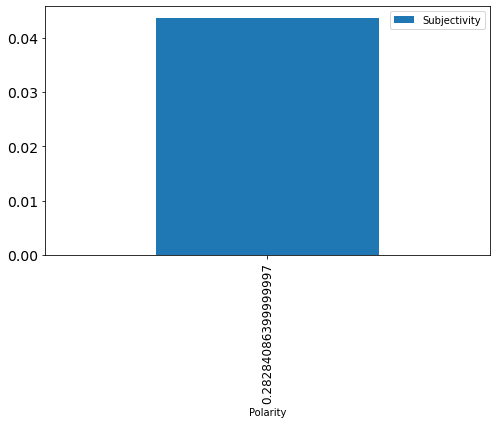

In [379]:

Polarity= blob.sentiment.polarity
Subjectivity=blob.sentiment.subjectivity
dwr = pd.read_csv('xx.csv')
dwr.head()

plt.rcParams['figure.figsize'] = (7,6)
dwr.plot.bar(x='Polarity',y='Subjectivity')


In [380]:
Subjectivity

0.04359050249934227

In [381]:
Polarity

0.2828408642462508